# Initial probe of how many share by experiment arm


Consider this a data check:
- is the number of completions consistent across experiment arms?
- what is the overall share rate?
- how does the share rate differ by experiment arm?

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# This data was filtered to responses that were considered completed (included attention check at the end)
# Downloaded from Qualtrics indicated by date in filename
data_filepath = '../data/amazon-purchases-survey-v0-completed-11-30-2022-raw.csv'
# data_filepath = '../data/amazon-purchases-survey-v0-completed-11-22-2022-raw.csv'


In [2]:
pd.set_option('max_columns', None)

df = pd.read_csv(data_filepath)
print('shape:', df.shape)
print('all fields:', df.columns)
df.head(2)

shape: (1693, 93)
all fields: Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q43_Id', 'Q43_Name', 'Q43_Size',
       'Q43_Type', 'Q-requirements-1', 'Q-requirements-2', 'intro-1',
       'intro-2', 'Q-prolific', 'Q-prolific-mturk', 'Q-mturk-account',
       'Q-accnt-attn-check', 'download', 'download-fail-expl',
       'download-fail-screen_Id', 'download-fail-screen_Name',
       'download-fail-screen_Size', 'download-fail-screen_Type', 'q-demos-age',
       'Q-demos-hispanic', 'Q-demos-race', 'Q-demos-education',
       'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
       'Q-demos-state', 'Q-amazon-use-howmany', 'Q-amazon-use-hh-size',
       'Q-amazon-use-how-oft', 'Q-substance-use_1', 'Q-substanc

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q43_Id,Q43_Name,Q43_Size,Q43_Type,Q-requirements-1,Q-requirements-2,intro-1,intro-2,Q-prolific,Q-prolific-mturk,Q-mturk-account,Q-accnt-attn-check,download,download-fail-expl,download-fail-screen_Id,download-fail-screen_Name,download-fail-screen_Size,download-fail-screen_Type,q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,Q-amazon-use-hh-size,Q-amazon-use-how-oft,Q-substance-use_1,Q-substance-use_2,Q-substance-use_3,Q-personal_1,Q-personal_2,Q-life-changes,Q-data-download,Q-share-error-1,Q-share-error-2-a,Q-share-error-2-b,Q-share-error-2-c0,Q-share-error-2-c,share-error-3,share-error-4_Id,share-error-4_Name,share-error-4_Size,share-error-4_Type,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,Q-data-value-05,Q-data-value-20,Q-data-value-50,Q-data-value-100,Q-data-value-any,Q-data-value-any_1_TEXT,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Q-attn-check,Q-comments,SurveyID,ResponseID,FQID,API_TOKEN,BATCH,RandomID,PROLIFIC_PID,STUDY_ID,SESSION_ID,showdata,incentive,consent
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Do you have an active Amazon account?,Have you used your Amazon account to make purc...,Introduction\n\n \nThis survey is part of a MI...,Survey questions and data collection\n\nWe wil...,What is your Prolific ID?,Do you also complete surveys (or HITs) using A...,Is the Amazon.com account that you use to comp...,"Since you have different Amazon accounts, will...",Start the data download process\n\n \nGo to th...,Please explain below why you were not able to ...,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,What is your age group?,"Are you of Spanish, Hispanic, or Latino origin?",Choose one or more races that you consider you...,What is the highest level of education you hav...,What was your total household income before ta...,How do you describe yourself?,Which best describes your sexual orientation?,"50 States, D.C. and Puerto Rico",How many people do you share your Amazon accou...,"How many people are in your ""household""?",How often do you (+ anyone you share your acco...,Are any of the following the case for:\n\nYou ...,Are any of the following the case for:\n\nYou ...,Are any of the following the case for:\n\nYou ...,Are any of the following the case for:\n\nYou ...,Are any of the following the case for:\n\nYou ...,"In 2021 did you, or someone you share your Ama...",Amazon data\n \n\nGo back to the Amazon page w...,What was the issue?,Do you have an active Amazon account that you ...,Can you log into that Amazon account during th...,Do you also complete surveys or HITs on Amazon...,Is the Amazon.com account that you use to comp...,Please describe the issue here.,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Click to insert the file from Amazon below.\n ...,Click to insert the file from Amazon below.\n ...,Click to insert the file from Amazon below.\n ...,Click to insert the file from Amazon below.\n ...,Click to inser

Codebook

In [3]:
"""
Utility for importing into notebooks.
"""

# This is a dump from the recode values exported from qualtrics Q_state.
# Qualtrics put the states in alphabetical order for their recode value, did not code by FIPs
states_recode_text = '1\nAlabama\n2\nAlaska\n3\nArizona\n4\nArkansas\n5\nCalifornia\n6\nColorado\n7\nConnecticut\n8\nDelaware\n9\nDistrict of Columbia\n10\nFlorida\n11\nGeorgia\n12\nHawaii\n13\nIdaho\n14\nIllinois\n15\nIndiana\n16\nIowa\n17\nKansas\n18\nKentucky\n19\nLouisiana\n20\nMaine\n21\nMaryland\n22\nMassachusetts\n23\nMichigan\n24\nMinnesota\n25\nMississippi\n26\nMissouri\n27\nMontana\n28\nNebraska\n29\nNevada\n30\nNew Hampshire\n31\nNew Jersey\n32\nNew Mexico\n33\nNew York\n34\nNorth Carolina\n35\nNorth Dakota\n36\nOhio\n37\nOklahoma\n38\nOregon\n39\nPennsylvania\n40\nPuerto Rico\n41\nRhode Island\n42\nSouth Carolina\n43\nSouth Dakota\n44\nTennessee\n45\nTexas\n46\nUtah\n47\nVermont\n48\nVirginia\n49\nWashington\n50\nWest Virginia\n51\nWisconsin\n52\nWyoming\n53\nI do not reside in the United States'
states_recode_list = states_recode_text.split('\n')
states_choices_map = {states_recode_list[i]: states_recode_list[i+1] for i in range(0, len(states_recode_list), 2)}

# {QID: {Q: Q text, choices: map}}
codebook = {
    'q-demos-age': {
        'Q': 'How old are you?',
        'choices': {
            '1':'18 - 24 years',
            '2':'25 - 34 years',
            '3':'35 - 44 years',
            '4':'45 - 54 years',
            '5':'55 - 64 years',
            '6':'65 or older'
        },
    },
    'Q-demos-race': {
        'Q': 'Choose one or more races that you consider yourself to be',
        'choices': {
            '1':'White',
            '2':'Black or African American',
            '3':'American Indian or Alaska Native',
            '4':'Asian',
            '5':'Native Hawaiian or Pacific Islander',
            '6':'Other'
        },
    },
    'Q-demos-education': {
        'Q':'What is the highest level of education you have completed?',
        'choices': {
            '1':'Some high school or less',
            '2':'High school diploma or GED',
            '3':'Bachelor\'s degree',
            '4':'Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)',
            '5':'Prefer not to say'
        }
        
    },
    'Q-demos-income': {
        'Q': 'What was your total household income in the previous year before taxes?',
        'choices': {
            '1':'Less than \$25,000','2':'\$25,000 to \$49,999',
            '3':'\$50,000 to $74,999','4':'\$75,000 to \$99,999',
            '5':'\$100,000 to $149,999','6':'\$150,000 or more',
            '7':'Prefer not to say',
        },
    },
    'Q-demos-gender': {
        'Q':'How do you describe yourself?',
        'choices': {'1':'Male','2':'Female','3':'Other', '4':'Prefer not to say'},
    },
    'Q-sexual-orientation': {
      'Q':'Which best describes your sexual orientation?',
        'choices':{
            '1':'heterosexual (straight)',
            '2':'LGBTQ+',
            '3':'prefer not to say'
        },
    },
    'Q-demos-state': {
        'Q':'In which state do you currently reside?',
        'choices': states_choices_map,
    },
}


In [4]:
# Drop the Qualtrics metadata
df = df.drop([0,1])

In [5]:
df[
    ['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50', 'showdata', 'incentive']
].head()

,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,showdata,incentive
2,NaN,NaN,NaN,1,NaN,false,bonus-20
3,NaN,NaN,NaN,NaN,1,true,bonus-50
4,NaN,1,NaN,NaN,NaN,false,altruism
5,NaN,NaN,1,NaN,NaN,true,bonus-05
6,NaN,NaN,NaN,1,NaN,false,bonus-20


In [6]:
# add boolean indicating share
df['share'] = df[
    ['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50']
].astype(float).fillna(0).sum(axis=1)
df[['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50', 'showdata', 'incentive', 'share']].head()

,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,showdata,incentive,share
2,NaN,NaN,NaN,1,NaN,false,bonus-20,1.0
3,NaN,NaN,NaN,NaN,1,true,bonus-50,1.0
4,NaN,1,NaN,NaN,NaN,false,altruism,1.0
5,NaN,NaN,1,NaN,NaN,true,bonus-05,1.0
6,NaN,NaN,NaN,1,NaN,false,bonus-20,1.0


Aggregate the data

Make a table:

```
incentive, showdata, count, share rate
```

In [7]:
def get_aggregate_share_df(df):
    return df.groupby(['incentive','showdata'])['share'].agg(['count','mean']).round(3).reset_index()

In [8]:
agg_share_df = get_aggregate_share_df(df)
agg_share_df

,incentive,showdata,count,mean
0,altruism,false,174,0.787
1,altruism,true,180,0.861
2,bonus-05,false,173,0.699
3,bonus-05,true,163,0.810
4,bonus-20,false,172,0.791
5,bonus-20,true,158,0.873
6,bonus-50,false,174,0.879
7,bonus-50,true,167,0.892
8,control,false,157,0.771
9,control,true,173,0.855


In [10]:
# overall
N = agg_share_df['count'].sum()
overall_share_rate = df['share'].mean().round(3)

print('N = %s' % N)
print('overall share rate: %s' % overall_share_rate)

N = 1691
overall share rate: 0.822


In [13]:
def plot_count(pdf, ax):
    width = 0.4
    (pdf[pdf['showdata']=='true']['count']
     .plot(
        kind='bar', color='lightgray', edgecolor='black', hatch='//',
        label='show data = true',
        ax=ax, width=width, position=1
    ))
    (pdf[pdf['showdata']=='false']['count']
     .plot(
        kind='bar', color='black', 
        edgecolor='black', 
        label='show data = false',
        ax=ax, width=width, position=0)
    )
    ax.set_ylabel('Completions')
    ax.set_xlabel('incentive (random experiment arm)')
    ax.set_xlim([-0.5,4.5])
    ax.legend(facecolor='white', framealpha=0.98, loc='lower right')
    _ = ax.set_xticklabels(pdf[pdf['showdata']=='true']['incentive'], rotation=0)

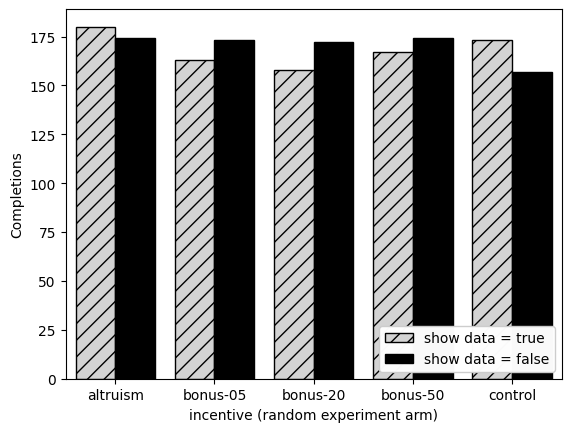

In [16]:
# plot count
fig,ax = plt.subplots(1,1)#, dpi=150)
plot_count(agg_share_df, ax)

In [17]:
def plot_share_rate(pdf, ax, overall_share_rate=overall_share_rate):
    width = 0.4
    (pdf[pdf['showdata']=='true']['mean']
     .plot(
        kind='bar', color='lightgray', edgecolor='black', hatch='//',
        label='show data = true',
        ax=ax, width=width, position=1
    ))
    (pdf[pdf['showdata']=='false']['mean']
     .plot(
        kind='bar', color='black', 
        edgecolor='black', 
        label='show data = false',
        ax=ax, width=width, position=0)
    )
    if overall_share_rate is not None:
        ax.hlines(overall_share_rate, -1, 5, color='gray', label='overall')
    ax.set_ylabel('Share rate')
    ax.set_xlabel('incentive (random experiment arm)')
    ax.set_xlim([-0.5,4.5])
    ax.legend(facecolor='white', framealpha=0.98, loc='lower right')
    ax.set_ylim([0,1])
    _ = ax.set_xticklabels(pdf[pdf['showdata']=='true']['incentive'], rotation=0)

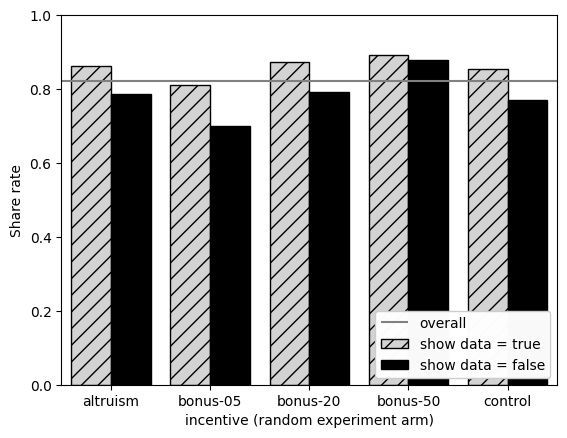

In [18]:
# plot count
fig,ax = plt.subplots(1,1)#, dpi=150)
plot_share_rate(agg_share_df, ax)

observations:
- showdata=true consistently higher share rate (like before, more consistent)
- incentive bonus: $0.05 has negative effect compared to control
- incentive: altruism has no noticable effect over control

## By demographic groups

How do you describe yourself?
{'1': 'Male', '2': 'Female', '3': 'Other', '4': 'Prefer not to say'}


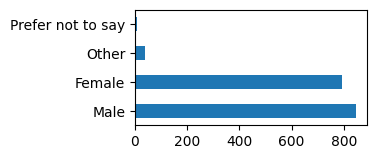

,index,count,pct
0,Male,848,50.15
1,Female,794,46.95
2,Other,40,2.37
3,Prefer not to say,9,0.53


In [19]:
Q = 'Q-demos-gender'
print('%s'%codebook[Q]['Q'])
print('%s'%codebook[Q]['choices'])
fig,ax = plt.subplots(figsize=(3,1.5))
_ = df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
plt.show()
demo_df = (df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
display(demo_df)

,incentive,showdata,count,mean
0,altruism,false,90,0.744
1,altruism,true,93,0.817
2,bonus-05,false,91,0.670
3,bonus-05,true,84,0.774
4,bonus-20,false,87,0.805
5,bonus-20,true,76,0.829
6,bonus-50,false,84,0.845
7,bonus-50,true,94,0.862
8,control,false,69,0.768
9,control,true,80,0.888


,incentive,showdata,count,mean
0,altruism,false,80,0.850
1,altruism,true,83,0.916
2,bonus-05,false,79,0.747
3,bonus-05,true,75,0.867
4,bonus-20,false,80,0.788
5,bonus-20,true,76,0.921
6,bonus-50,false,81,0.926
7,bonus-50,true,67,0.940
8,control,false,86,0.767
9,control,true,87,0.862


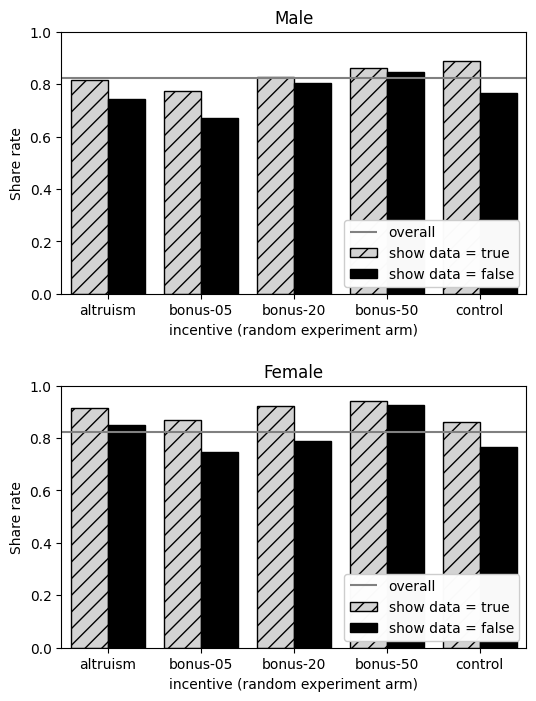

In [20]:
codebook_male_female = {'1': 'Male', '2': 'Female'}
figsize=(6,4)
fig,axes = plt.subplots(2,1,figsize=(figsize[0],figsize[1]*2))
plt.subplots_adjust(hspace=0.35)
for i, (k,v) in enumerate(codebook_male_female.items()):
    demo_df = df[df[Q]==k]
    demo_agg_share_df = get_aggregate_share_df(demo_df)
    display(demo_agg_share_df)
    ax = axes[i]
    plot_share_rate(demo_agg_share_df, ax)
    ax.set_title(v)

Observations:
- incentive: altruism has no noticiable effect for males but seems to have positive share effect on females
- all incentives (vs control) seem to have a larger positive effect on female share rate

What was your total household income in the previous year before taxes?
{'1': 'Less than \\$25,000', '2': '\\$25,000 to \\$49,999', '3': '\\$50,000 to $74,999', '4': '\\$75,000 to \\$99,999', '5': '\\$100,000 to $149,999', '6': '\\$150,000 or more', '7': 'Prefer not to say'}


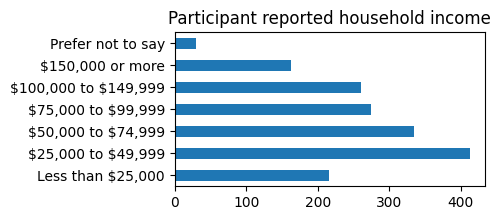

,index,count,pct
0,"Less than \$25,000",216,12.77
1,"\$25,000 to \$49,999",413,24.42
2,"\$50,000 to $74,999",335,19.81
3,"\$75,000 to \$99,999",275,16.26
4,"\$100,000 to $149,999",260,15.38
5,"\$150,000 or more",162,9.58
6,Prefer not to say,30,1.77


In [28]:
Q = 'Q-demos-income'
print('%s'%codebook[Q]['Q'])
print('%s'%codebook[Q]['choices'])
fig,ax = plt.subplots(figsize=(4,2))
_ = df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
ax.set_title('Participant reported household income')
plt.show()
demo_df = (df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
display(demo_df)

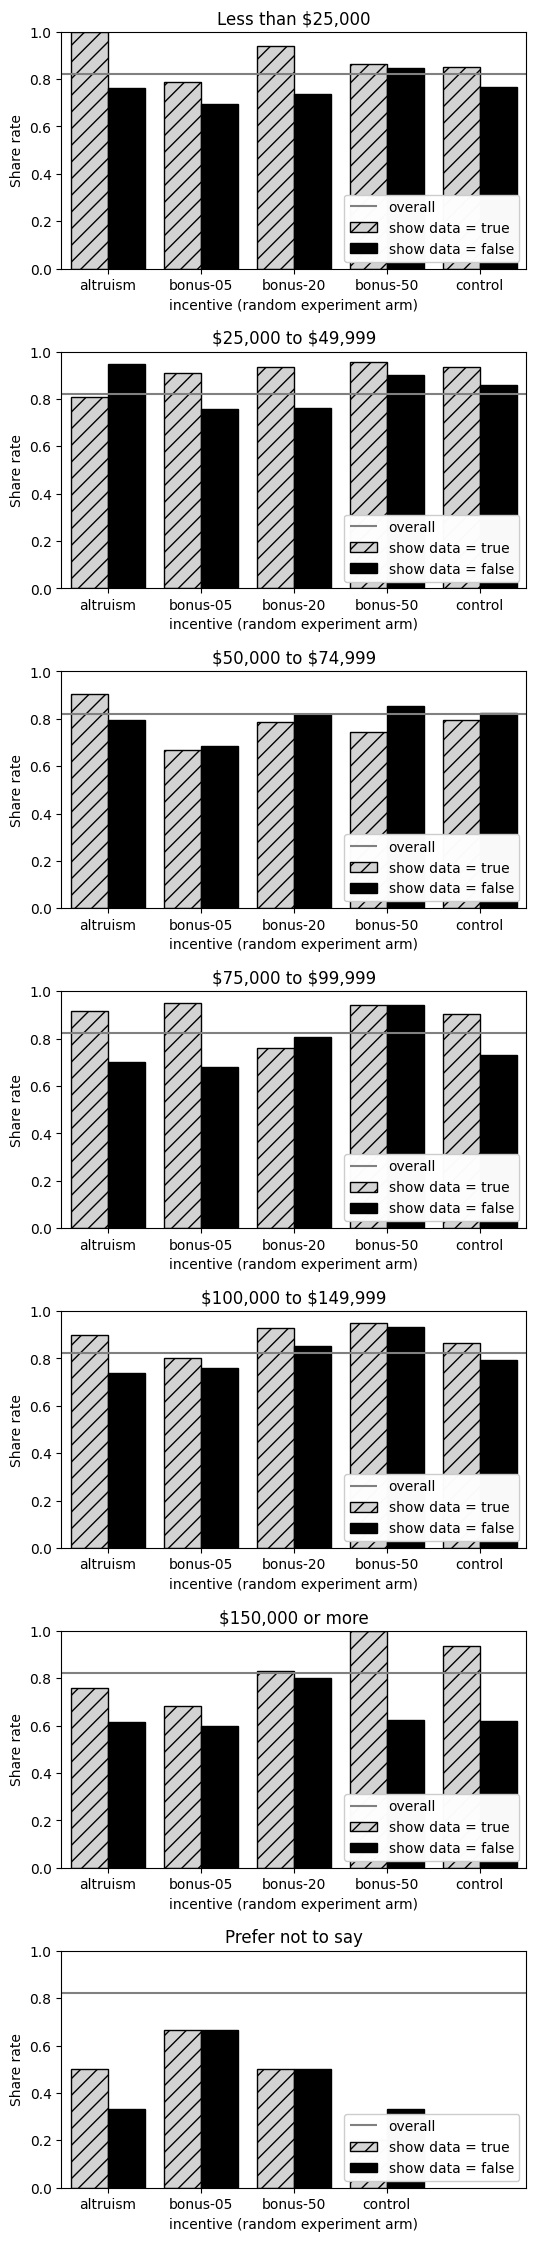

In [23]:
figsize=(6,4)
choices = codebook[Q]['choices']
fig,axes = plt.subplots(len(choices),1,figsize=(figsize[0],figsize[1]*len(choices)))
plt.subplots_adjust(hspace=0.35)
for i, (k,v) in enumerate(codebook[Q]['choices'].items()):
    demo_df = df[df[Q]==k]
    demo_agg_share_df = get_aggregate_share_df(demo_df)
    #display(demo_agg_share_df)
    ax = axes[i]
    plot_share_rate(demo_agg_share_df, ax)
    ax.set_title(v)

How old are you?
{'1': '18 - 24 years', '2': '25 - 34 years', '3': '35 - 44 years', '4': '45 - 54 years', '5': '55 - 64 years', '6': '65 or older'}


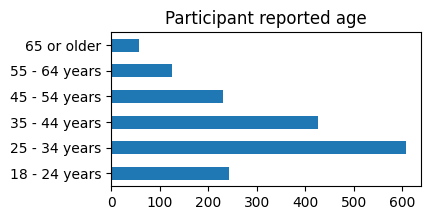

,index,count,pct
0,18 - 24 years,242,14.31
1,25 - 34 years,609,36.01
2,35 - 44 years,426,25.19
3,45 - 54 years,231,13.66
4,55 - 64 years,125,7.39
5,65 or older,58,3.43


In [69]:
Q = 'q-demos-age'
print('%s'%codebook[Q]['Q'])
print('%s'%codebook[Q]['choices'])
fig,ax = plt.subplots(figsize=(4,2))
_ = df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
ax.set_title('Participant reported age')
plt.show()
demo_df = (df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
display(demo_df)

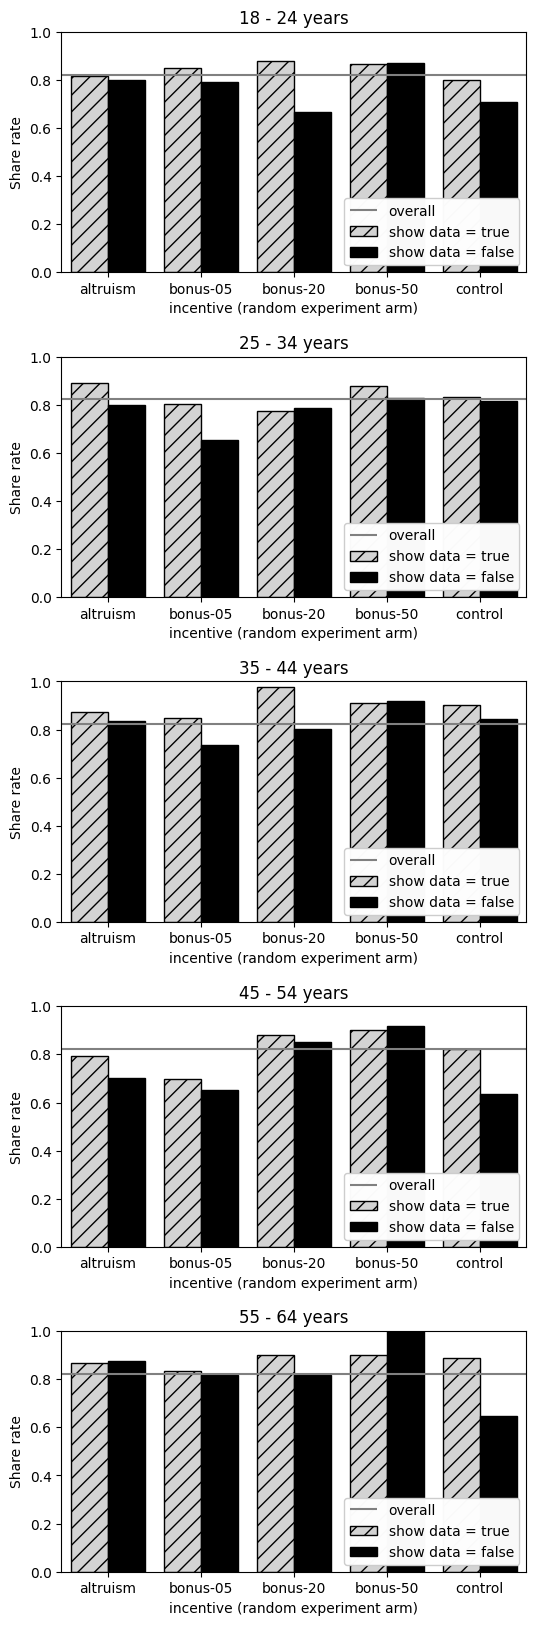

In [70]:
figsize=(6,4)
# exclude categories with N < 60
demo_df = demo_df[demo_df['count']>60]
fig,axes = plt.subplots(len(demo_df),1,figsize=(figsize[0],figsize[1]*len(demo_df)))
plt.subplots_adjust(hspace=0.35)
i = 0
for (k,v) in codebook[Q]['choices'].items():
    if v not in demo_df['index'].values:
        continue
    demo_agg_share_df = get_aggregate_share_df(df[df[Q]==k])
    #display(demo_agg_share_df)
    ax = axes[i]
    plot_share_rate(demo_agg_share_df, ax)
    ax.set_title(v)
    i += 1

What is the highest level of education you have completed?
{'1': 'Some high school or less', '2': 'High school diploma or GED', '3': "Bachelor's degree", '4': 'Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)', '5': 'Prefer not to say'}


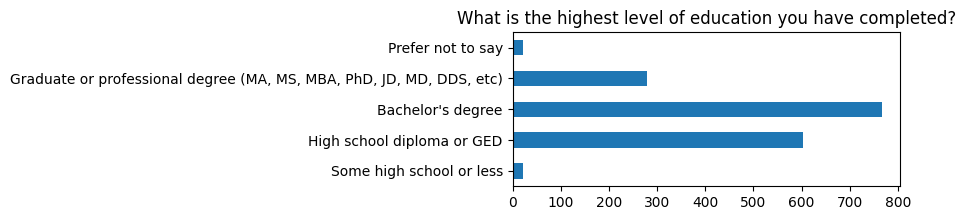

,index,count,pct
0,Some high school or less,21,1.24
1,High school diploma or GED,603,35.66
2,Bachelor's degree,766,45.30
3,"Graduate or professional degree (MA, MS, MBA, ...",280,16.56
4,Prefer not to say,21,1.24


In [57]:
Q = 'Q-demos-education'
print('%s'%codebook[Q]['Q'])
print('%s'%codebook[Q]['choices'])
fig,ax = plt.subplots(figsize=(5,2))
_ = df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
ax.set_title(codebook[Q]['Q'])
plt.show()
demo_df = (df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
display(demo_df)

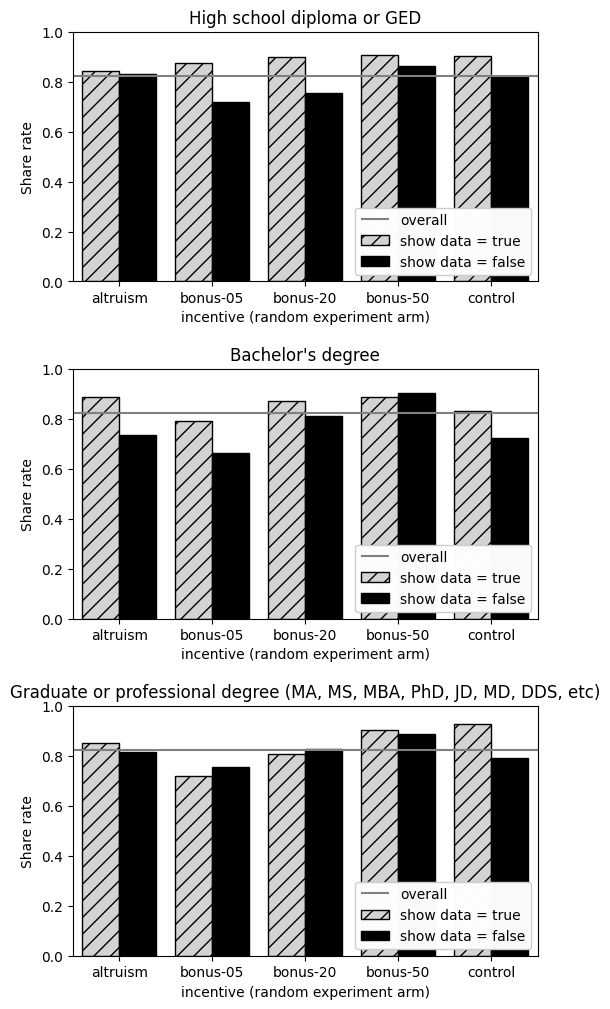

In [66]:
figsize=(6,4)
# exclude categories with N < 60
demo_df = demo_df[demo_df['count']>60]
fig,axes = plt.subplots(len(demo_df),1,figsize=(figsize[0],figsize[1]*len(demo_df)))
plt.subplots_adjust(hspace=0.35)
i = 0
for (k,v) in codebook[Q]['choices'].items():
    if v not in demo_df['index'].values:
        continue
    demo_agg_share_df = get_aggregate_share_df(df[df[Q]==k])
    #display(demo_agg_share_df)
    ax = axes[i]
    plot_share_rate(demo_agg_share_df, ax)
    ax.set_title(v)
    i += 1

Which best describes your sexual orientation?
{'1': 'heterosexual (straight)', '2': 'LGBTQ+', '3': 'prefer not to say'}


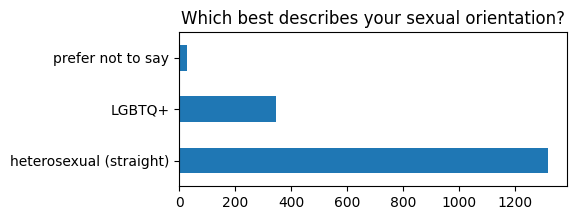

,index,count,pct
0,heterosexual (straight),1319,78.0
1,LGBTQ+,345,20.4
2,prefer not to say,27,1.6


In [67]:
Q = 'Q-sexual-orientation'
print('%s'%codebook[Q]['Q'])
print('%s'%codebook[Q]['choices'])
fig,ax = plt.subplots(figsize=(5,2))
_ = df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
ax.set_title(codebook[Q]['Q'])
plt.show()
demo_df = (df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
display(demo_df)

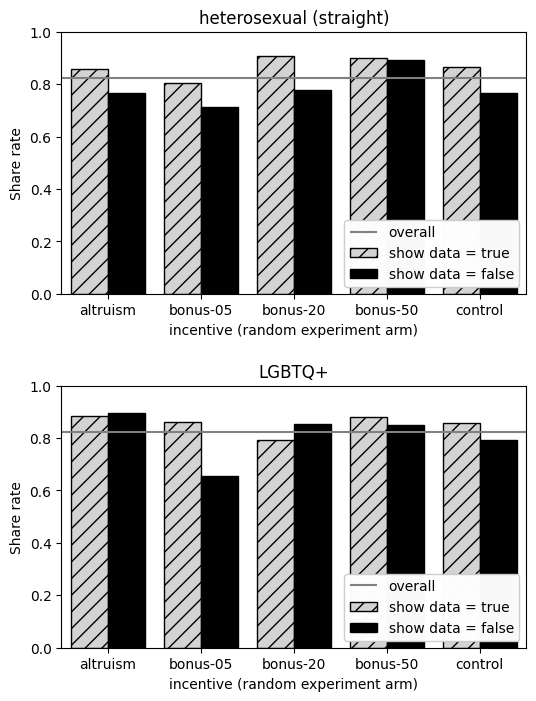

In [68]:
figsize=(6,4)
# exclude categories with N < 60
demo_df = demo_df[demo_df['count']>60]
fig,axes = plt.subplots(len(demo_df),1,figsize=(figsize[0],figsize[1]*len(demo_df)))
plt.subplots_adjust(hspace=0.35)
i = 0
for (k,v) in codebook[Q]['choices'].items():
    if v not in demo_df['index'].values:
        continue
    demo_agg_share_df = get_aggregate_share_df(df[df[Q]==k])
    #display(demo_agg_share_df)
    ax = axes[i]
    plot_share_rate(demo_agg_share_df, ax)
    ax.set_title(v)
    i += 1